In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv("../LinReg.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


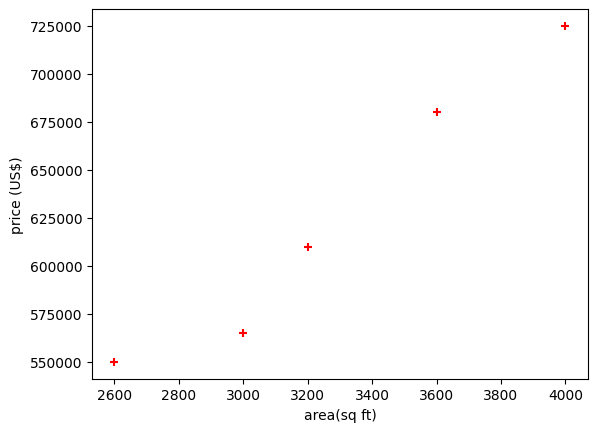

In [3]:
%matplotlib inline
plt.xlabel('area(sq ft)')
plt.ylabel('price (US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)
# print(df[['area']])

LinearRegression()

In [5]:
reg.predict([[2222]])

C:\Users\volde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([482336.64383562])

In [6]:
reg.coef_

array([135.78767123])

In [7]:
reg.intercept_

180616.43835616432

In [8]:
d = pd.read_csv("../CSVs/area.csv")
d.head(5)

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [9]:
p = reg.predict(d)

In [10]:
d['price'] = p

In [11]:
d.head(5)

,area,price
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [12]:
d.to_csv("../CSVs/predicted.csv",index=False)

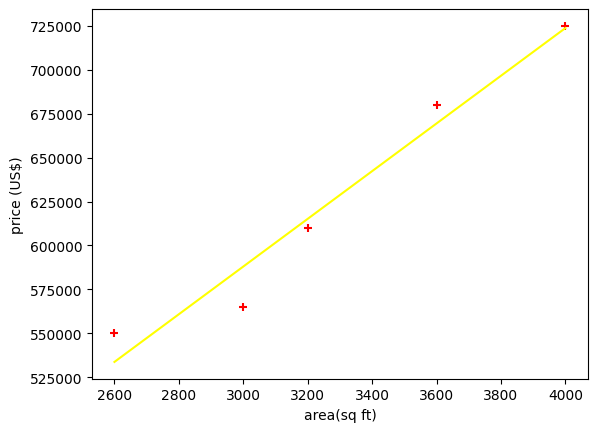

In [13]:
%matplotlib inline
plt.xlabel('area(sq ft)')
plt.ylabel('price (US$)')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='yellow')

In [14]:
df2 = pd.read_csv("../CSVs/canada_pci.csv")
df2.head(5)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [15]:
reg2 = linear_model.LinearRegression()
reg2.fit(df2[['year']],df2['per capita income (US$)'])

LinearRegression()

In [16]:
reg2.predict([[2020]])

C:\Users\volde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

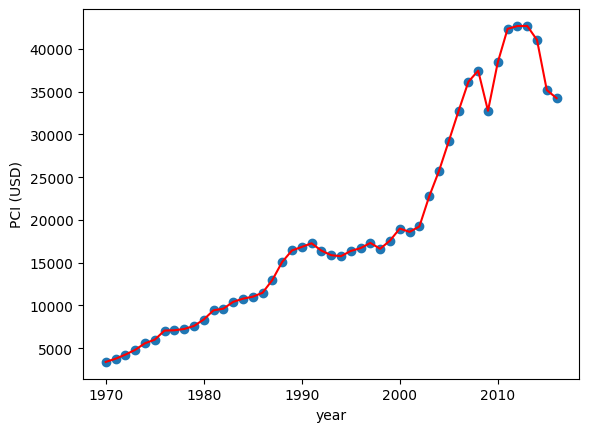

In [17]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('PCI (USD)')
plt.scatter(df2.year,df2['per capita income (US$)'])
plt.plot(df2[['year']],df2['per capita income (US$)'],color='red')

In [18]:
import pickle

In [19]:
with open("linearModel",'wb') as f: 
    pickle.dump(reg2,f)

In [20]:
with open("linearModel",'rb') as f: 
    model = pickle.load(f)

In [22]:
model.predict([[2020]])

C:\Users\volde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [25]:
import joblib

In [28]:
joblib.dump(reg2,"model_jb")

['model_jb']

In [29]:
model2 = joblib.load("model_jb")

In [30]:
model2.predict([[2020]])

C:\Users\volde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])